# Data Wrangling

Os dado foram obtidos em: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados

O objetivo é carregar os dados brutos e selecionar as variáveis de interesse sobre o hábito de estudo dos alunos que realizaram o ENEM. Em seguida, classificá-los em grupos de acordo com as notas e gerar datasets com pickle para análise. Por fim, um modelo será criado a partir desses dados.

In [1]:
import pandas as pd

## 1. Dados brutos do questionário de hábitos de estudo

In [2]:
df_habitos_2022 = pd.read_csv('microdados_enem_2022/DADOS/QUEST_HAB_ESTUDO.csv', sep=';')

In [4]:
df_habitos_2022.columns

Index(['NU_INSCRICAO', 'TP_RESPOSTA', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005',
       'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023',
       'Q024', 'Q025A', 'Q025B', 'Q025C', 'Q025D', 'Q025E', 'Q025F', 'Q026A',
       'Q026B', 'Q026C', 'Q026D', 'Q026E', 'Q026F', 'Q026G', 'Q026H', 'Q027',
       'Q028A', 'Q028B', 'Q028C', 'Q028D', 'Q028E', 'Q028F', 'Q028G', 'Q028H',
       'Q028I', 'Q028J', 'Q028K', 'Q028L', 'Q028M', 'Q028N', 'Q028O', 'Q028P',
       'Q028Q', 'Q028R', 'Q029', 'Q030A', 'Q030B', 'Q030C', 'Q030D', 'Q030E',
       'Q030F', 'Q030G', 'Q031', 'Q032A', 'Q032B', 'Q032C', 'Q032D', 'Q032E',
       'Q032F', 'Q032G', 'Q033A', 'Q033B', 'Q033C', 'Q033D', 'Q033E', 'Q033F',
       'Q033G', 'Q033H', 'Q033I', 'Q033J', 'Q034'],
      dtype='object')

## 2. Tratando dados nulos

In [13]:
df_habitos_2022 = df_habitos_2022.dropna()

Optei por considerar apenas os participantes que responderam o questionário por completo, ou seja, cerca de 3% da base (78 mil participantes)

## 3. Carga e tratamento do dicionário
O proprio site do Enem fornece um diconário de dados em xlsx, realizei um pequeno tratamento utilizando o próprio excel e salvei csv para carregar no jupyter.

In [21]:
df_dicionário = pd.read_csv('microdados_enem_2022/DICIONÁRIO/hab_estudo.csv', sep=';', encoding='latin1')
df_q.head()

,variavel,questao,resposta,descricao_resp
0,TP_RESPOSTA,Tipo de opção de resposta ao questionário,0,Não (Participante optou por não responder o qu...
1,TP_RESPOSTA,Tipo de opção de resposta ao questionário,1,Sim (Participante optou por responder o questi...
2,TP_RESPOSTA,Tipo de opção de resposta ao questionário,2,Responder Depois
3,Q001,"Considerando a etapa de Ensino Médio, qual des...",A,Eu estive matriculado(a) no Ensino Médio regular.
4,Q001,"Considerando a etapa de Ensino Médio, qual des...",B,"Eu estive matriculado(a) no Ensino Médio, em t..."


In [22]:
# Removendo os espaços em brancos do df_q
df_dicionário['questao'].fillna(method='ffill', inplace=True)
df_dicionário['variavel'].fillna(method='ffill', inplace=True)
df_dicionário.head()

,variavel,questao,resposta,descricao_resp
0,TP_RESPOSTA,Tipo de opção de resposta ao questionário,0,Não (Participante optou por não responder o qu...
1,TP_RESPOSTA,Tipo de opção de resposta ao questionário,1,Sim (Participante optou por responder o questi...
2,TP_RESPOSTA,Tipo de opção de resposta ao questionário,2,Responder Depois
3,Q001,"Considerando a etapa de Ensino Médio, qual des...",A,Eu estive matriculado(a) no Ensino Médio regular.
4,Q001,"Considerando a etapa de Ensino Médio, qual des...",B,"Eu estive matriculado(a) no Ensino Médio, em t..."


## 4. Carga do DataFrame com as Notas
Agora carrego as informações da prova onde estou interessado em apenas algumas informações como:

In [23]:
colunas = [
    'NU_INSCRICAO',
    'TP_FAIXA_ETARIA',
    'TP_SEXO',
    'TP_COR_RACA',
    'TP_ESCOLA',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_MT',
    'TP_LINGUA'
]

df_notas = pd.read_csv('microdados_enem_2022/DADOS/MICRODADOS_ENEM_2022.csv', sep=';', encoding='latin1', usecols=colunas)

In [24]:
df_notas

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA
0,210057943671,14,M,2,1,NaN,NaN,NaN,NaN,0
1,210057516120,14,M,1,1,NaN,NaN,NaN,NaN,0
2,210057280536,5,F,2,1,421.1,546.0,498.8,565.3,1
3,210055724397,6,M,3,1,490.7,388.6,357.8,416.0,1
4,210055097896,4,M,3,1,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
3476100,210056389903,3,M,1,2,NaN,NaN,NaN,NaN,1
3476101,210057205644,14,F,1,2,NaN,NaN,NaN,NaN,1
3476102,210056699189,2,M,1,2,527.9,627.0,583.3,637.1,0
3476103,210056983033,3,M,3,3,NaN,NaN,NaN,NaN,0


### Considerando apenas os participantes da pesquisa

In [31]:
df_notas = df_notas[df_notas['NU_INSCRICAO'].isin(df_habitos_2022['NU_INSCRICAO'])]
df_notas

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA
23,210057706656,4,M,3,1,476.0,559.2,607.3,625.4,1
41,210054839231,4,F,3,1,402.1,465.3,346.3,460.6,1
55,210056012033,3,F,1,2,819.5,684.9,657.8,905.5,0
70,210057974197,5,F,1,2,486.4,501.6,384.9,515.7,1
113,210055758710,4,F,3,1,404.8,550.0,525.7,617.0,0
...,...,...,...,...,...,...,...,...,...,...
3475371,210055296313,5,M,1,1,NaN,NaN,NaN,NaN,1
3475712,210055900340,2,M,3,3,511.3,544.5,557.1,499.4,0
3475827,210054991409,3,M,1,2,444.5,533.2,470.7,464.2,0
3476061,210055081282,6,M,3,2,574.3,420.0,426.4,514.7,0


## 5. Garantindo os mesmo dados nas duas bases

In [35]:
import missingno as msno

<Axes: >

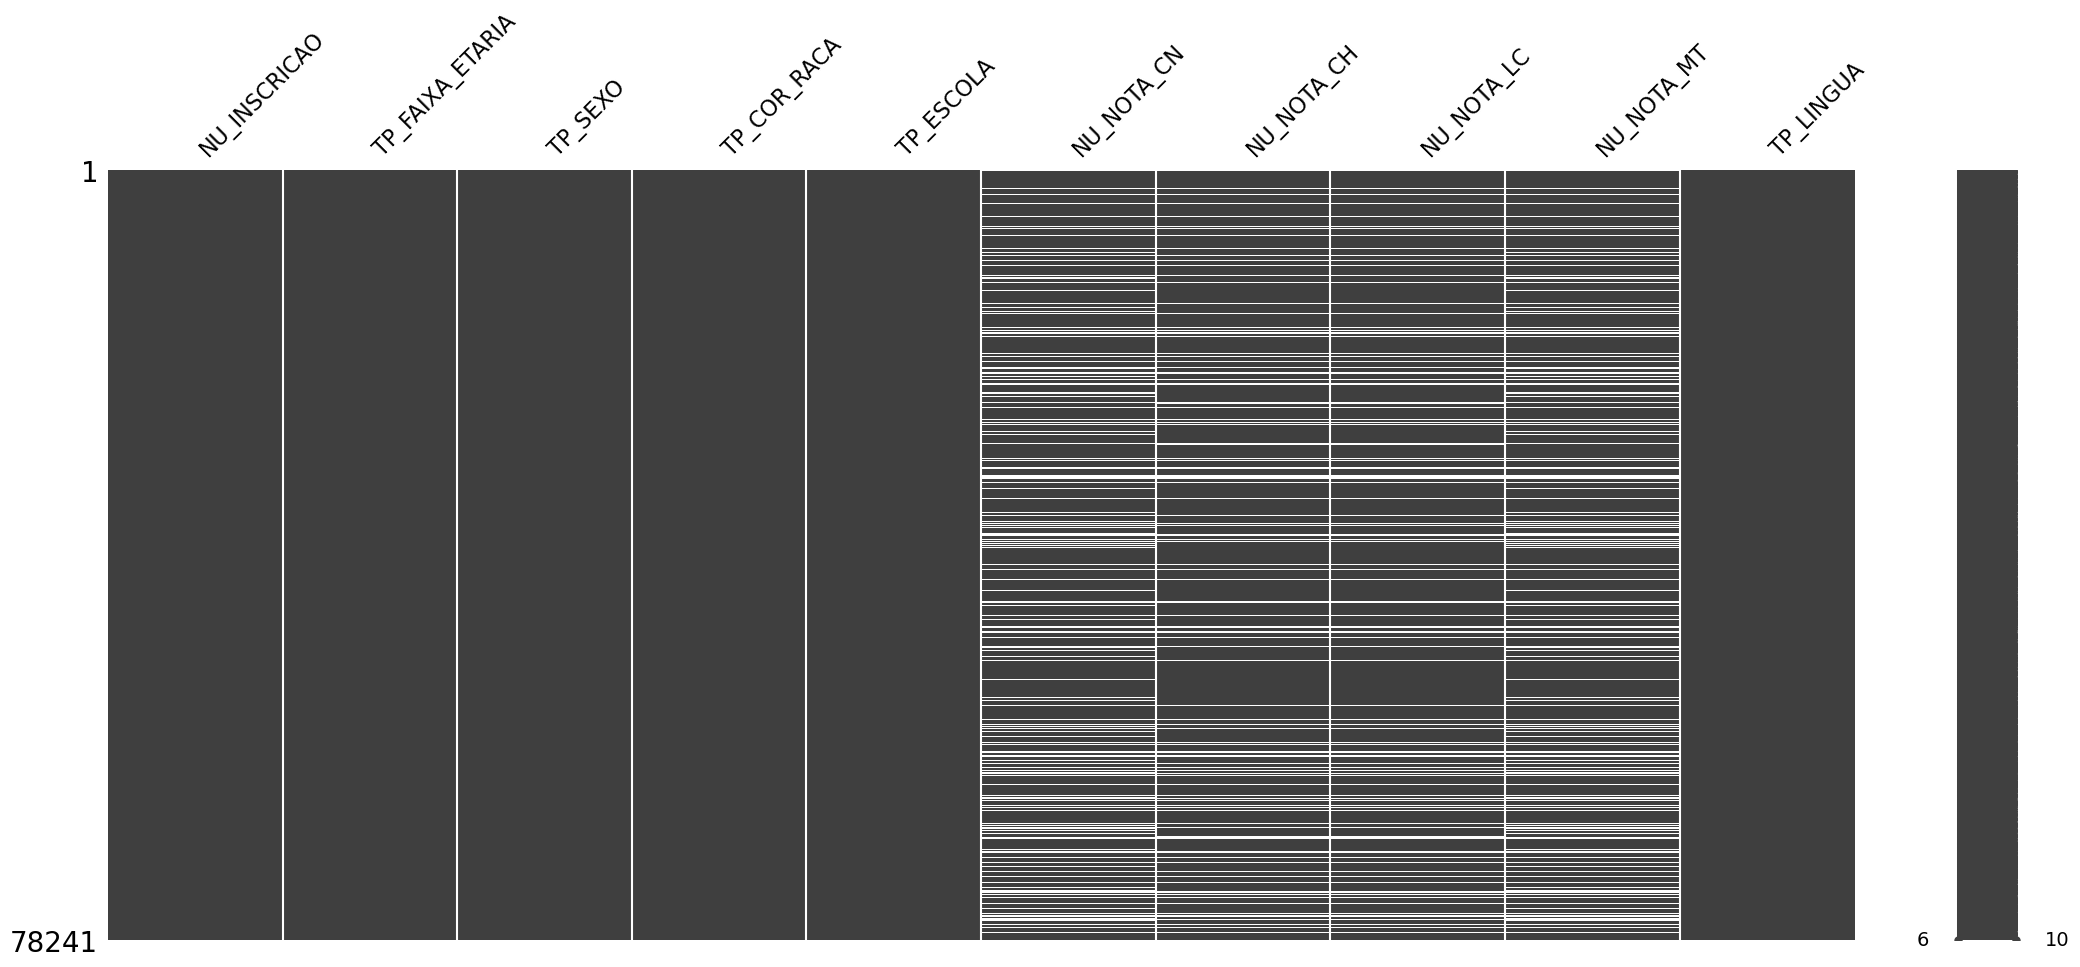

In [37]:
msno.matrix(df_notas)

Como as notas serão meu target irei precisar remover os participantes que não possuem notas, porém como posso ter casos de participantes que não fizeram alguma prova, irei remover esses participantes no momento que eu processar a base para cada area do conhecimento.

## 6. Gerando bases em Pickle

In [39]:
df_notas.to_pickle('microdados_enem_2022/DADOSpkl/notas.pkl')

In [40]:
df_habitos_2022.to_pickle('microdados_enem_2022/DADOSpkl/habitos.pkl')